# Compte rendu projet numérique de mathématiques

In [1]:
#Prémilinaires
# Third-Party Libraries
# ---------------------

# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display


def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f


def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

def f(x, y):
    return np.sin(x) + 2.0 * np.sin(y)

grad_f = grad(f)

grad_f(0.0, 0.0) # array([1., 2.])

def f(x, y):
    return np.array([x + 2 * y, 3 * x + 4 * y])

J_f = J(f)

J_f(0.0, 0.0) # array([[1., 2.], [3., 4.]])

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

def f2(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2

#display_contour(f1, x=np.linspace(-1.0, 1.0, 100), y=np.linspace(-1.0, 1.0, 100), levels=10)

N=100
eps=1e-5


## Question 1

Soit l'ensemble de niveau c est vide, soit l'ensemble de niveau c de f est borné (démo avec limite) et fermé (image réciproque du singleton {c} par f fonction continue) si non vide

## Question 2

$p(x_0)$ est le produit scalaire du vecteur unitaire 
$$
\overrightarrow{u} = \frac{1}{||\nabla f(x_0)||}\times rot_{-\frac{\pi}{2}}(\partial_1 f(x_0),\partial_2 f(x_0)) = \frac{1}{||\nabla f(x_0)||}\times (\partial_2 f(x_0),-\partial_1 f(x_0))
$$ 
où $rot_{-\frac{\pi}{2}}$ est la rotation d'angle $-\frac{\pi}{2}$ du plan, avec le vecteur 
$$
(x_1-x_{10},x_2-_{20})
$$
i.e. 
$$
p(x_0) = \overrightarrow{u}.(x_1-x_{10},x_2-_{20}) = \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_1 - x_{10}) -
\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} (x_2 - x_{20})
$$

## Question 3

Théorème des fonctions implicites obviously mais je sais pas quoi faire

## Question 4

Ca doit découler de la question précédente du coup

## Question 5

Il faut une epsilon bien plus grand que l'espilon machine (on est en 32 ou 64 bit?), mais si il est trop petit, la convergence n'aura jamais lieu en N étapes

## Tâche 1

On peut montrer la relation de récurence avec un DL

In [2]:
#On prépare pour le rendu graphique de la question suivante
Pointsx=[]
Pointsy=[]


def Newton(F, x0, y0, eps=eps, N=N):
    Jacf=J(F)
    Pointsx.append(x0)
    Pointsy.append(y0)
    for _ in range(N):
        Z=np.array([x0,y0])
        FZ=np.array(F(x0,y0))
        Jinv=np.linalg.inv(Jacf(x0,y0))
        Z = Z - np.transpose(np.dot(Jinv, np.transpose(FZ) ))
        x = Z[0]
        y = Z[1]
        Pointsx.append(x)
        Pointsy.append(y)
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return x, y
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")



## Tâche 2

(0.4472135954999579, 0.4472135954999579) 0.8


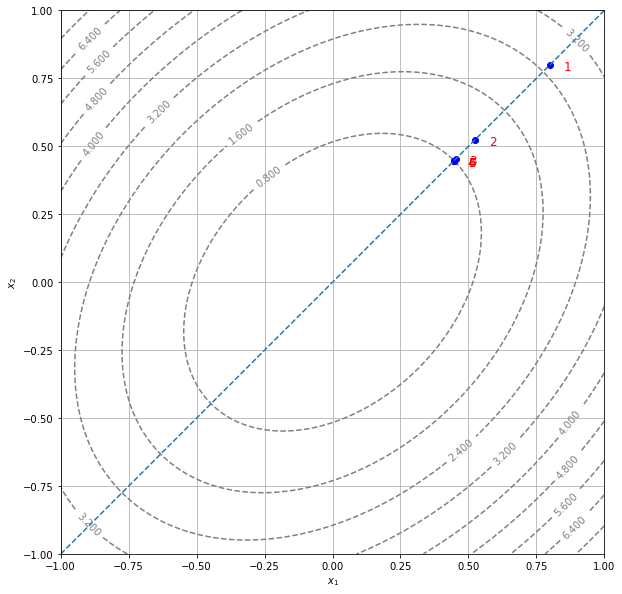

In [3]:
c=0.8

def G(x,y):
    return np.array([f1(x,y)-c,x-y])


res=Newton(G,c,c)
print(res,f1(res[0],res[1]))


display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)

plt.plot(Pointsx,Pointsy,'bo')
i=1
for x, y in zip(Pointsx, Pointsy):
    plt.text(x+0.05, y-0.02, str(i), color="red", fontsize=12)
    i+=1


plt.plot([-1,1],[-1,1],'--')
plt.show()


#On observe la convergence ultra-rapide typique de la méthode de Newton

## Tâche 3


On cherche une solution telle que
$\begin{cases}
f(x_0,y_0)=f(x_1,y_1)=c \\
d((x_0,y_0),(x_1,y_1))=(x_0-x_1)^2+(y_o-y_1)^2=\delta
\end{cases}$

Cela veut dire trouver un zéro de la fonction $\begin{array}{ccccc}
H_0 & : & \mathbb{R}^2 & \to & \mathbb{R}^2 \\
 & & (x,y) & \mapsto & (f(x,y)-c , (x_0-x)^2+(y_o-y)^2-\delta) \\
\end{array}$

Plus la contrainte d'aller "à droite" par rapport à  $\nabla f(x_0, y_0)$ 



L'idée est de choisir comme point de départ, l'intersection de la demi-droite allant 'à droite' perpendiculairement à $\nabla f(x_0, y_0)$  et du cercle de rayon $\delta$

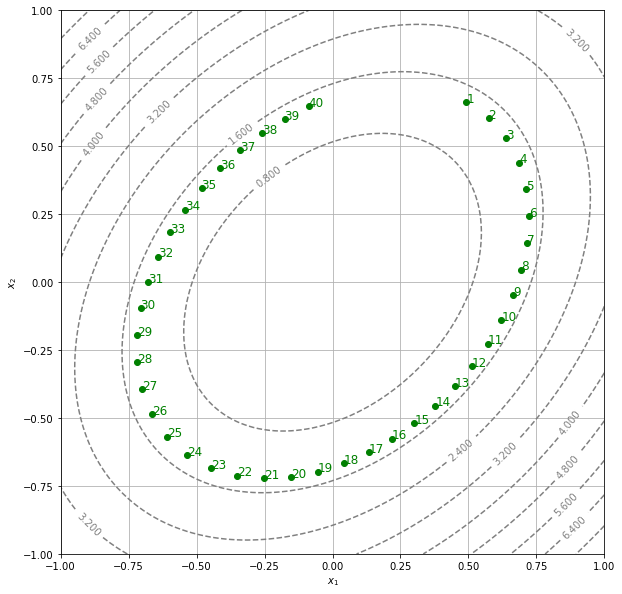

In [6]:

def intersectiondroite(f,x0,y0,delta):
    grad_f = grad(f)
    g=grad_f(x0, y0)
    new_norme=delta/np.sqrt(g[0]**2+g[1]**2)
    ortho=[g[1]*new_norme,-g[0]*new_norme]
    return (x0+ortho[0],y0+ortho[1])


#interctiondroite(f1,0.6,0.6,2)

def level_curve(f, x0, y0, delta=0.1, N=40, eps=eps):
    res=np.zeros((2,N))
    c=f(x0,y0)
    for i in range (N):
        def T3(x,y):
            return np.array([f(x,y)-c,(x0-x)**2+(y0-y)**2-delta**2])
        x1,y1=intersectiondroite(f,x0,y0,delta)
        x2,y2=Newton(T3,x1,y1,eps)
        res[0][i],res[1][i]=x2,y2
        x0,y0=x2,y2
    return res

LC=level_curve(f1, 0.4,0.7)


display_contour(
    f1, 
    x=np.linspace(-1.0, 1.0, 100), 
    y=np.linspace(-1.0, 1.0, 100), 
    levels=10 # 10 levels, automatically selected
)

plt.plot(LC[0],LC[1],'bo',color='green')
i=1
for x, y in zip(LC[0], LC[1]):
    plt.text(x, y, str(i), color="green", fontsize=12)
    i+=1
plt.show()

## Tâche 4

## Question 8

On pose $P_1=(x_1,y_1)$ , $P_2=(x_2,y_2)$ , $U_1=(a_1,b_1)$ et $U_2=(a_2,b_2)$ 


Avec les conditions $\gamma(0) = P_1$ et $\gamma(1) = P_2$  ,on a:

$\begin{cases}
x_1=a \\
y_1=d \\
x_2=a+b+c \\
y_2=d+e+f \\
\end{cases}$

Ensuite, avec $\gamma'(0)$ est dans la même direction et le même sens que $u_1$ et $\gamma'(1)$ est dans la même direction et le même sens que $u_2$, on a

$\begin{cases}
\exists \lambda >0, \gamma'(0)=\lambda.U_1  \\
\exists \mu >0, \gamma'(1)=\mu.U_2
\end{cases}$

On fixe un tel couple $(\lambda,\mu)$

On a ensuite

$\begin{cases}
b=\lambda.a_1  \\
e=\lambda.b_1  \\
b+2c=\mu.a_2 \\
e+2f=\mu.b_2
\end{cases}$

